In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# BNA Airport-Flight Delay Analysis: Pre-COVID, During-COVID, and Post-COVID Impact

## Project Overview
This capstone project analyzes flight performance at **Nashville International Airport (BNA)** with a focus on **departure delays, arrival delays, and cancellations** across major U.S. airlines. The goal is to understand how airline operations at BNA were affected **before, during, and after the COVID-19 pandemic**, and how recovery patterns varied by airline.

In [131]:
departures = pd.read_csv('../../data/Departure.csv',encoding='latin1',low_memory=False)

In [132]:
departures.shape

(497696, 16)

In [133]:
departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497696 entries, 0 to 497695
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Carrier Code                              497696 non-null  object
 1   Airlines                                  497696 non-null  object
 2   Date (MM/DD/YYYY)                         497696 non-null  object
 3   Flight Number                             497696 non-null  int64 
 4   Destination Airport                       497696 non-null  object
 5   Destination City                          497696 non-null  object
 6   Scheduled departure time                  497696 non-null  object
 7   Actual departure time                     497673 non-null  object
 8   Scheduled elapsed time (Minutes)          497696 non-null  int64 
 9   Actual elapsed time (Minutes)             497696 non-null  int64 
 10  Departure delay (Minutes)       

In [134]:
departures.isna().sum()

Carrier Code                                 0
Airlines                                     0
Date (MM/DD/YYYY)                            0
Flight Number                                0
Destination Airport                          0
Destination City                             0
Scheduled departure time                     0
Actual departure time                       23
Scheduled elapsed time (Minutes)             0
Actual elapsed time (Minutes)                0
Departure delay (Minutes)                    0
Delay Carrier (Minutes)                      0
Delay Weather (Minutes)                      0
Delay National Aviation System (Minutes)     0
Delay Security (Minutes)                     0
Delay Late Aircraft Arrival (Minutes)        0
dtype: int64

In [135]:
departures.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,1/1/2018,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0
1,AA,American Airlines,1/1/2018,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15


##BOM(Byte Order Mark ) issue was there before column name so used (encoding="utf-8-sig) to remove it for all df.

In [136]:
arrivals = pd.read_csv('../../data/Arrivals.csv', encoding='utf-8-sig', low_memory=False)

In [137]:
arrivals.shape

(513001, 16)

In [138]:
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513001 entries, 0 to 513000
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Carrier Code                              513001 non-null  object
 1   Airlines                                  513001 non-null  object
 2   Date (MM/DD/YYYY)                         513001 non-null  object
 3   Flight Number                             513001 non-null  int64 
 4   Origin Airport                            513001 non-null  object
 5   Origin City                               513001 non-null  object
 6   Scheduled Arrival Time                    513001 non-null  object
 7   Actual Arrival Time                       512744 non-null  object
 8   Scheduled Elapsed Time (Minutes)          513001 non-null  int64 
 9   Actual Elapsed Time (Minutes)             513001 non-null  int64 
 10  Arrival Delay (Minutes)         

In [139]:
origin_nulls = arrivals[arrivals['Origin City'].isna()]
origin_nulls.head()

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)


In [140]:
arrivals.isna().sum()

Carrier Code                                  0
Airlines                                      0
Date (MM/DD/YYYY)                             0
Flight Number                                 0
Origin Airport                                0
Origin City                                   0
Scheduled Arrival Time                        0
Actual Arrival Time                         257
Scheduled Elapsed Time (Minutes)              0
Actual Elapsed Time (Minutes)                 0
Arrival Delay (Minutes)                       0
Delay Carrier (Minutes)                       0
Delay Weather (Minutes)                       0
Delay National Aviation System (Minutes)      0
Delay Security (Minutes)                      0
Delay Late Aircraft Arrival (Minutes)         0
dtype: int64

In [141]:
arrivals.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,1/1/2018,829,PHL,"Philadelphia, PA",9:34:00 PM,9:29:00 PM,139,129,-5,0,0,0,0,0
1,AA,American Airlines,1/1/2018,851,CLT,"Charlotte, NC",12:09:00 PM,12:05:00 PM,89,90,-4,0,0,0,0,0


In [142]:
cancellations = pd.read_csv('../../data/Airlines_Cancellation.csv',encoding='utf-8-sig',low_memory=False)

In [143]:
cancellations.shape

(10370, 6)

In [144]:
cancellations.isna().sum()

Carrier Code           0
Airlines               0
Date (MM/DD/YYYY)      0
Flight_Number          0
Destination Airport    0
Destination City       0
dtype: int64

### Data Cleaning & Preparation (Excel + Python)

- The original dataset contained several missing (null) values.
- Initial data cleaning was performed in **Excel** before importing the data into Python.
- The columns were removed in Excel due to high null counts and limited analytical value.
- After cleaning, the updated CSV files were imported into the Jupyter Notebook for further analysis.
- A new column (City) was created to map **airport codes** to their corresponding **city and state** using a lookup approach.

### DataFrames Used for Analysis

 **Departure DataFrame**  
  Contains information related to scheduled vs actual departure times, departure delays, and associated factors.


In [145]:
departures.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,1/1/2018,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0
1,AA,American Airlines,1/1/2018,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15


###Rename and changed the Date columns

In [146]:
departures.rename(columns={'Date (MM/DD/YYYY)':'Flight Date'},inplace =True)

In [147]:
departures['Flight Date'] = pd.to_datetime(departures['Flight Date'])

In [148]:
departures.head(2)

,Carrier Code,Airlines,Flight Date,Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,2018-01-01,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0
1,AA,American Airlines,2018-01-01,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15


- **Arrival DataFrame**  
  Includes arrival times, arrival delays, and on-time performance metrics for inbound flights.

In [149]:
arrivals.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,1/1/2018,829,PHL,"Philadelphia, PA",9:34:00 PM,9:29:00 PM,139,129,-5,0,0,0,0,0
1,AA,American Airlines,1/1/2018,851,CLT,"Charlotte, NC",12:09:00 PM,12:05:00 PM,89,90,-4,0,0,0,0,0


In [150]:
arrivals.rename(columns={'Date (MM/DD/YYYY)':'Flight Date'},inplace =True)

In [151]:
arrivals['Flight Date'] = pd.to_datetime(arrivals['Flight Date'])

- **Cancellation DataFrame**  
  Focuses on flight cancellations and related attributes such as airline, airport, and date.

In [152]:
cancellations.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight_Number,Destination Airport,Destination City
0,AA,American Airlines,1/4/2018,469,PHL,"Philadelphia, PA"
1,AA,American Airlines,1/8/2018,1899,PHL,"Philadelphia, PA"


In [153]:
cancellations.rename(columns={'Date (MM/DD/YYYY)':'Flight Date'},inplace =True)

In [154]:
cancellations['Flight Date'] = pd.to_datetime(cancellations['Flight Date'])

## Merged all three dataframe in one so that we will have all details in one place which will be easier to filter,group,or visualize.

In [155]:
print(departures.groupby(['Carrier Code','Flight Date']).size().max())
print(arrivals.groupby(['Carrier Code','Flight Date']).size().max())

178
179


### Created Covid Phase column for Departures,Arrivals and Cancellation 

## Departures

In [156]:
def covid_phase(date):
    if date < pd.Timestamp('2020-01-01'):
        return 'Pre-COVID'
    elif date <= pd.Timestamp('2021-12-31'):
        return 'During-COVID'
    else:
        return 'Post-COVID'

In [157]:
departures['COVID_Phase'] = departures['Flight Date'].apply(covid_phase)

In [158]:
departures['Month'] = departures['Flight Date'].dt.to_period('M').dt.to_timestamp()

## Total number of flights by Year and Covid Phase

In [159]:
departures['Year'] = departures['Flight Date'].dt.year

In [160]:
total_dep_flights = departures.groupby(['Year','COVID_Phase']).size().reset_index(name= 'Total Flights')
total_dep_flights

,Year,COVID_Phase,Total Flights
0,2018,Pre-COVID,54770
1,2019,Pre-COVID,62791
2,2020,During-COVID,46440
3,2021,During-COVID,56612
4,2022,Post-COVID,67999
5,2023,Post-COVID,78471
6,2024,Post-COVID,81201
7,2025,Post-COVID,49412


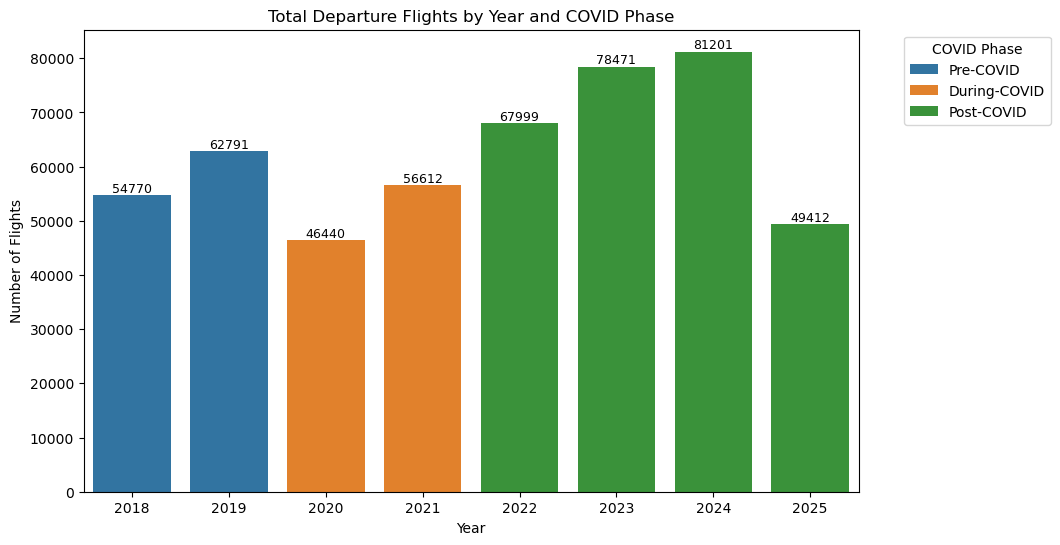

In [161]:
covidphase_colors = {'Pre-COVID':'#1f77b4', 'During-COVID':'#ff7f0e', 'Post-COVID':'#2ca02c'}
plt.figure(figsize=(10,6))
ax = sns.barplot(data=total_dep_flights,x='Year',y='Total Flights',hue='COVID_Phase',palette=covidphase_colors)
plt.title('Total Departure Flights by Year and COVID Phase')
plt.ylabel('Number of Flights')
plt.xlabel('Year')
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)
plt.savefig('Total_dep_flights.png', dpi=300)    

In [162]:
departures['COVID_Phase'].value_counts()

COVID_Phase
Post-COVID      277083
Pre-COVID       117561
During-COVID    103052
Name: count, dtype: int64

In [163]:
monthly_dep_delay = (departures.groupby(['Month', 'COVID_Phase'])['Departure delay (Minutes)'].mean().reset_index())

In [164]:
monthly_dep_delay = monthly_dep_delay.sort_values('Month')

In [165]:
monthly_dep_delay.head()

,Month,COVID_Phase,Departure delay (Minutes)
0,2018-01-01,Pre-COVID,7.862438
1,2018-02-01,Pre-COVID,8.518284
2,2018-03-01,Pre-COVID,8.747007
3,2018-04-01,Pre-COVID,10.608382
4,2018-05-01,Pre-COVID,13.319888


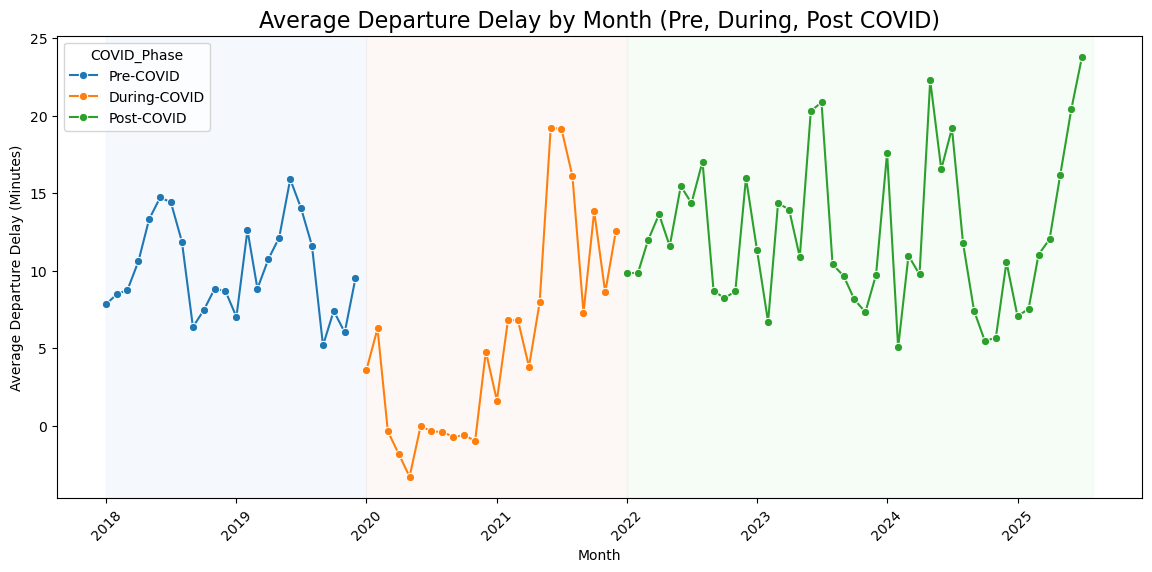

In [166]:
plt.figure(figsize=(14,6))
### Line plot for average departure delay
sns.lineplot(data=monthly_dep_delay,x='Month',y='Departure delay (Minutes)',hue='COVID_Phase',palette=['#1f77b4','#ff7f0e','#2ca02c'],marker='o')
### Add shaded regions for COVID phases
plt.axvspan(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-12-31'), color='#d0e1f9', alpha=0.2)  # Pre-COVID
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), color='#f9e0d0', alpha=0.2)  # During-COVID
plt.axvspan(pd.Timestamp('2022-01-01'), pd.Timestamp('2025-07-31'), color='#d0f9d6', alpha=0.2)  # Post-COVID
### Labels and title
plt.title('Average Departure Delay by Month (Pre, During, Post COVID)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.savefig('BNA_Covid_Departure_trend.png', dpi=300)

###Which airlines were most impacted during each covid phase..

In [167]:
### Group by Airline and COVID Phase
airline_dep_delay = (departures.groupby(['Airlines', 'COVID_Phase'])['Departure delay (Minutes)'].mean().reset_index())

In [168]:
airline_dep_delay = airline_dep_delay.sort_values(['COVID_Phase', 'Departure delay (Minutes)'], ascending=[True, False])

In [169]:
airline_dep_delay.head(5)

,Airlines,COVID_Phase,Departure delay (Minutes)
21,United Airlines,During-COVID,9.527340
18,Spirit Airlines,During-COVID,8.873736
12,JetBlue Airways,During-COVID,8.438309
3,American Airlines,During-COVID,7.087473
15,Southwest Airlines,During-COVID,6.989967


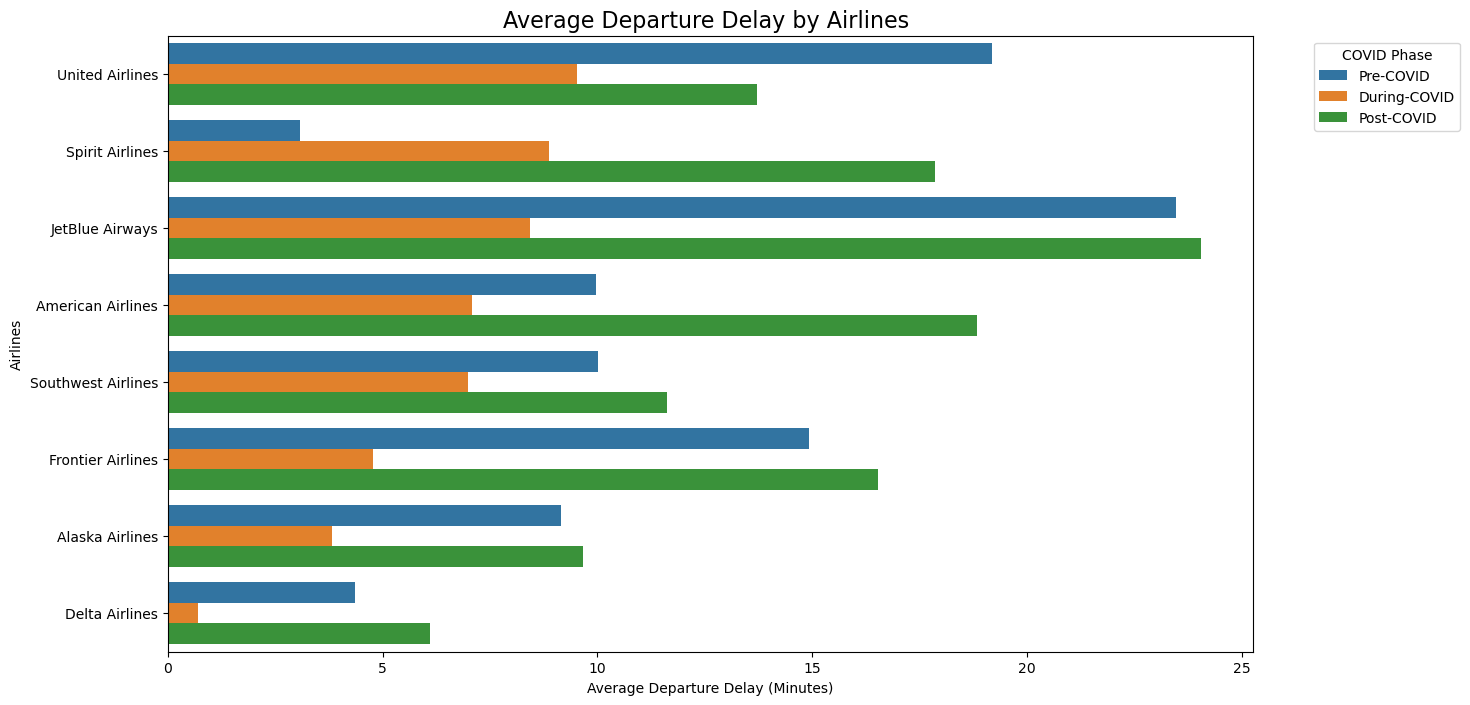

In [170]:
plt.figure(figsize=(14,8))
### I Specified hue order so colors match Pre, During, Post COVID###
sns.barplot(data=airline_dep_delay,x='Departure delay (Minutes)',y='Airlines',hue='COVID_Phase',hue_order=['Pre-COVID', 'During-COVID', 'Post-COVID'])
plt.title('Average Departure Delay by Airlines ', fontsize=16)
plt.xlabel('Average Departure Delay (Minutes)')
plt.ylabel('Airlines')
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('BNA_airline_delay_chart.png', dpi=300)

### Departure Delay Causes- What caused flights to depart late across covid phase?

In [187]:
departures.head(2)

,Carrier Code,Airlines,Flight Date,Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),COVID_Phase,Month,Year
0,AA,American Airlines,2018-01-01,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0,Pre-COVID,2018-01-01,2018
1,AA,American Airlines,2018-01-01,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15,Pre-COVID,2018-01-01,2018


In [203]:
dep_delay_causes=(departures.groupby('Year',as_index=False).agg({'Delay Carrier (Minutes)':'mean','Delay Weather (Minutes)':'mean','Delay Security (Minutes)':'mean','Delay Late Aircraft Arrival (Minutes)':'mean'}))

In [204]:
dep_delay_causes

,Year,Delay Carrier (Minutes),Delay Weather (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,2018,2.815100,0.308052,0.015647,4.953423
1,2019,2.792550,0.259607,0.013569,4.747145
2,2020,1.096856,0.105814,0.003036,1.297847
3,2021,3.246679,0.431234,0.018176,5.256589
4,2022,3.580656,0.449168,0.010633,5.758746
5,2023,3.514305,0.270762,0.020887,6.480776
6,2024,3.424564,0.545720,0.005825,6.043226
7,2025,3.687971,0.756901,0.012973,7.733627


In [205]:
dep_delay_causes = dep_delay_causes.set_index('Year').sort_index()

<Figure size 1400x700 with 0 Axes>

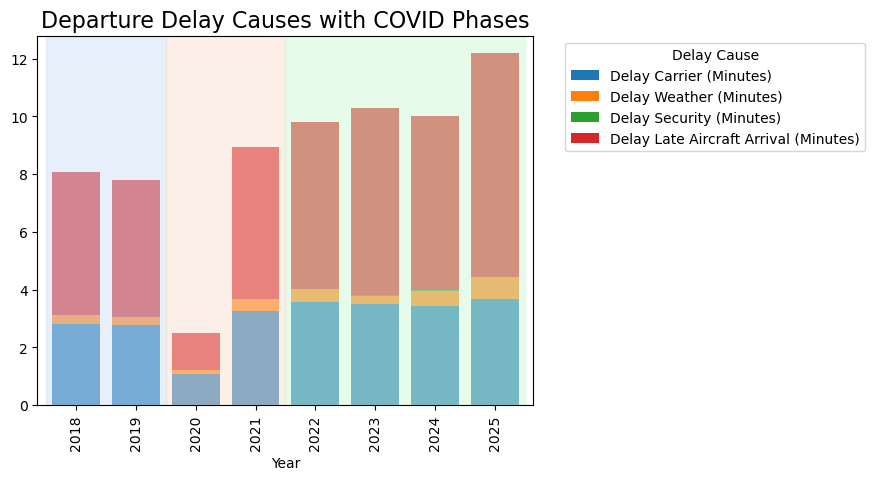

In [215]:
plt.figure(figsize=(14,7))
dep_delay_causes.plot(kind='bar',stacked=True,width=0.8)
plt.axvspan(-0.5, dep_delay_causes.index.get_loc(2020)-0.5,color='#d0e1f9', alpha=0.50)
plt.axvspan(dep_delay_causes.index.get_loc(2020)-0.5,dep_delay_causes.index.get_loc(2021)+0.5,color='#f9e0d0', alpha=0.50)
plt.axvspan(dep_delay_causes.index.get_loc(2022)-0.5,len(dep_delay_causes)-0.5,color='#d0f9d6', alpha=0.50)
plt.title('Departure Delay Causes with COVID Phases', fontsize=16)
plt.legend(title='Delay Cause',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.savefig('Dep_delay_causes.png', dpi=300)

## Same for Arrivals to compare for avergae delay analysis--

In [171]:
arrivals['Flight Date'] = pd.to_datetime(arrivals['Flight Date'])

In [172]:
arrivals['Month'] = arrivals['Flight Date'].dt.to_period('M').dt.to_timestamp()

In [173]:
arrivals['Year'] = arrivals['Flight Date'].dt.year

In [174]:
##Created covid Phase column
def covid_phase(date):
    if date < pd.Timestamp('2020-01-01'):
        return 'Pre-COVID'
    elif date <= pd.Timestamp('2021-12-31'):
        return 'During-COVID'
    else:
        return 'Post-COVID'

In [175]:
arrivals['COVID_Phase'] = arrivals['Flight Date'].apply(covid_phase)

In [176]:
arrivals.head(2)

,Carrier Code,Airlines,Flight Date,Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Month,Year,COVID_Phase
0,AA,American Airlines,2018-01-01,829,PHL,"Philadelphia, PA",9:34:00 PM,9:29:00 PM,139,129,-5,0,0,0,0,0,2018-01-01,2018,Pre-COVID
1,AA,American Airlines,2018-01-01,851,CLT,"Charlotte, NC",12:09:00 PM,12:05:00 PM,89,90,-4,0,0,0,0,0,2018-01-01,2018,Pre-COVID


## Total number of arrivals flight by Year and Covid Phase

In [177]:
total_arr_flights = arrivals.groupby(['Year','COVID_Phase']).size().reset_index(name= 'Total Flights')
total_arr_flights

,Year,COVID_Phase,Total Flights
0,2018,Pre-COVID,54767
1,2019,Pre-COVID,62795
2,2020,During-COVID,46444
3,2021,During-COVID,56608
4,2022,Post-COVID,68005
5,2023,Post-COVID,78474
6,2024,Post-COVID,81198
7,2025,Post-COVID,64710


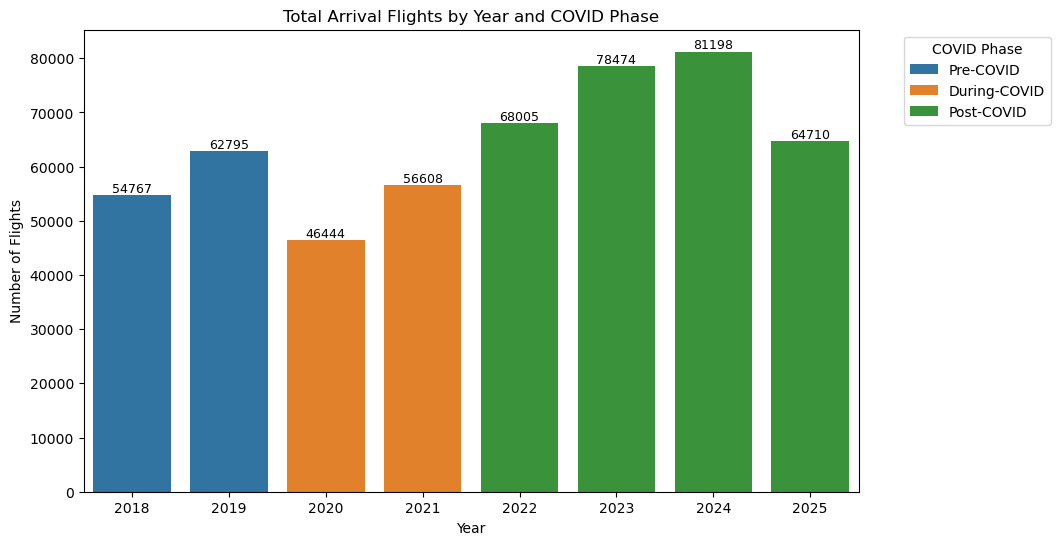

In [178]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=total_arr_flights,x='Year',y='Total Flights',hue='COVID_Phase',palette=covidphase_colors)
plt.title('Total Arrival Flights by Year and COVID Phase')
plt.ylabel('Number of Flights')
plt.xlabel('Year')
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)
plt.savefig('Total_arr_flights.png', dpi=300) 

In [179]:
##Grouped month and covid phase to get average arrivals delay
monthly_arr_delay = (arrivals.groupby(['Month','COVID_Phase'])['Arrival Delay (Minutes)'].mean().reset_index())

In [180]:
monthly_arr_delay = monthly_arr_delay.sort_values('Month')

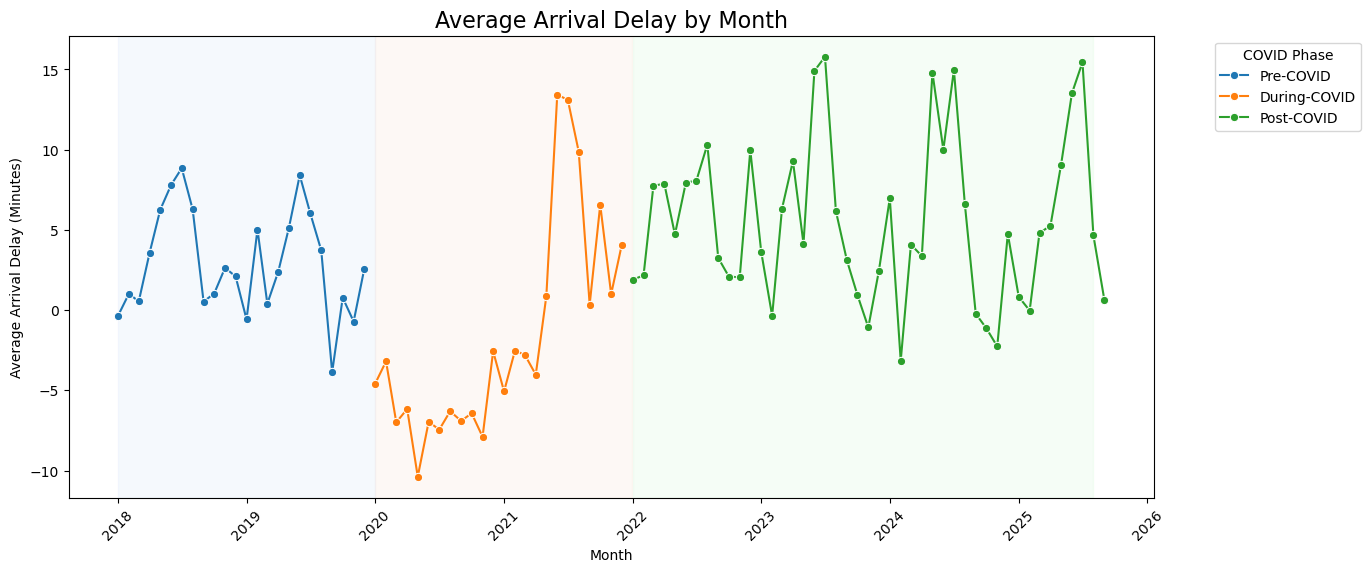

In [181]:
plt.figure(figsize=(14,6))
### Line plot for average departure delay
sns.lineplot(data=monthly_arr_delay,x='Month',y='Arrival Delay (Minutes)',hue='COVID_Phase',palette=['#1f77b4','#ff7f0e','#2ca02c'],marker='o')
### Add shaded regions for COVID phases
plt.axvspan(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-12-31'), color='#d0e1f9', alpha=0.2)  # Pre-COVID
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), color='#f9e0d0', alpha=0.2)  # During-COVID
plt.axvspan(pd.Timestamp('2022-01-01'), pd.Timestamp('2025-07-31'), color='#d0f9d6', alpha=0.2)  # Post-COVID
### Labels and title
plt.title('Average Arrival Delay by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.xticks(rotation=45)
### Move legend outside plot
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('BNA_Covid_Arrival_trend.png', dpi=300)

In [182]:
## to see airline -### Group by Airline and COVID Phase
airline_arr_delay = (arrivals.groupby(['Airlines', 'COVID_Phase'])['Arrival Delay (Minutes)'].mean().reset_index())

In [183]:
airline_arr_delay = airline_arr_delay.sort_values(['COVID_Phase', 'Arrival Delay (Minutes)'], ascending=[True, False])

In [184]:
airline_arr_delay.head(2)

,Airlines,COVID_Phase,Arrival Delay (Minutes)
18,Spirit Airlines,During-COVID,1.813499
12,JetBlue Airways,During-COVID,1.267711


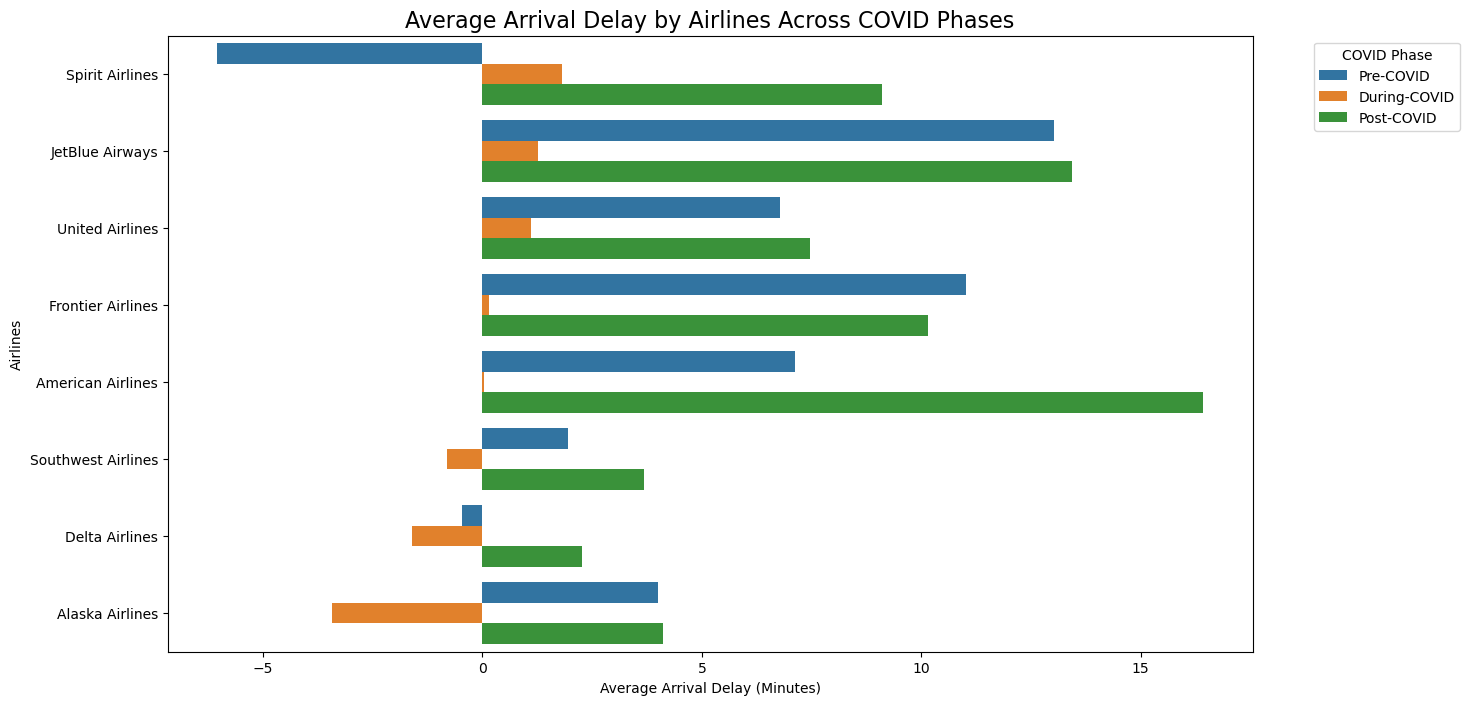

In [185]:
plt.figure(figsize=(14,8))
### I Specified hue order so colors matches Pre, During, Post COVID###
sns.barplot(data=airline_arr_delay,x='Arrival Delay (Minutes)',y='Airlines',hue='COVID_Phase',hue_order=['Pre-COVID', 'During-COVID', 'Post-COVID'])
plt.title('Average Arrival Delay by Airlines Across COVID Phases', fontsize=16)
plt.xlabel('Average Arrival Delay (Minutes)')
plt.ylabel('Airlines')
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('BNA_arr_delay_chart.png', dpi=300)

### What caused flights to arrive late across COVID phases?

In [216]:
arr_delay_causes=(arrivals.groupby('Year',as_index=False).agg({'Delay Carrier (Minutes)':'mean','Delay Weather (Minutes)':'mean','Delay Security (Minutes)':'mean','Delay Late Aircraft Arrival (Minutes)':'mean'}))

In [217]:
arr_delay_causes

,Year,Delay Carrier (Minutes),Delay Weather (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,2018,3.311027,0.447751,0.019318,4.568390
1,2019,3.344773,0.398790,0.021881,4.309483
2,2020,1.331324,0.141913,0.005469,1.030854
3,2021,3.738588,0.331190,0.043739,4.700290
4,2022,4.537387,0.380428,0.034689,5.505786
5,2023,4.079746,0.406937,0.042778,5.432627
6,2024,3.712468,0.366191,0.033326,5.932203
7,2025,3.673374,0.571473,0.031510,6.464720


In [218]:
arr_delay_causes = arr_delay_causes.set_index('Year').sort_index()

<Figure size 1400x700 with 0 Axes>

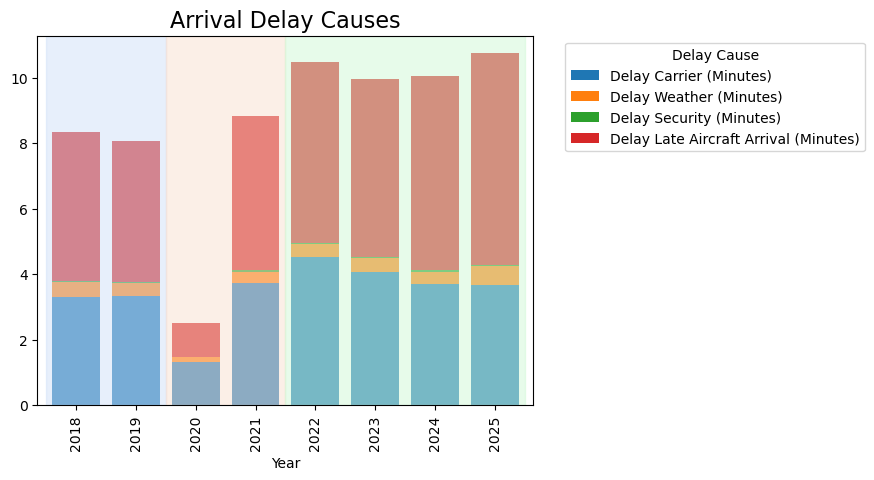

In [219]:
plt.figure(figsize=(14,7))
arr_delay_causes.plot(kind='bar',stacked=True,width=0.8)
plt.axvspan(-0.5, arr_delay_causes.index.get_loc(2020)-0.5,color='#d0e1f9', alpha=0.50)
plt.axvspan(arr_delay_causes.index.get_loc(2020)-0.5,arr_delay_causes.index.get_loc(2021)+0.5,color='#f9e0d0', alpha=0.50)
plt.axvspan(arr_delay_causes.index.get_loc(2022)-0.5,len(arr_delay_causes)-0.5,color='#d0f9d6', alpha=0.50)
plt.title('Arrival Delay Causes', fontsize=16)
plt.legend(title='Delay Cause',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.savefig('Arr_delay_causes.png', dpi=300)